In [12]:
# ==========================================
#  DIABETES RISK PREDICTION (SDG 3 PROJECT)
# ==========================================
# PROBLEM STATEMENT:
# "Can we build a simple AI model that predicts whether
#  a person may have diabetes risk, based on basic health measurements?"
#
# WHY THIS MATTERS (SDG 3 - Good Health & Well-Being):
# Early prediction helps people take care of their health.
# AI can support doctors and improve awareness.
# ==========================================

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (Pima Indians Diabetes Dataset)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Show the first 5 rows so students understand what data looks like
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


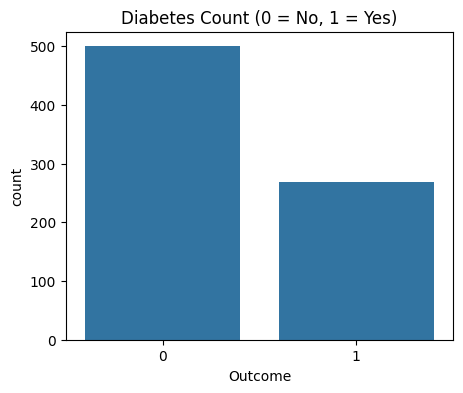

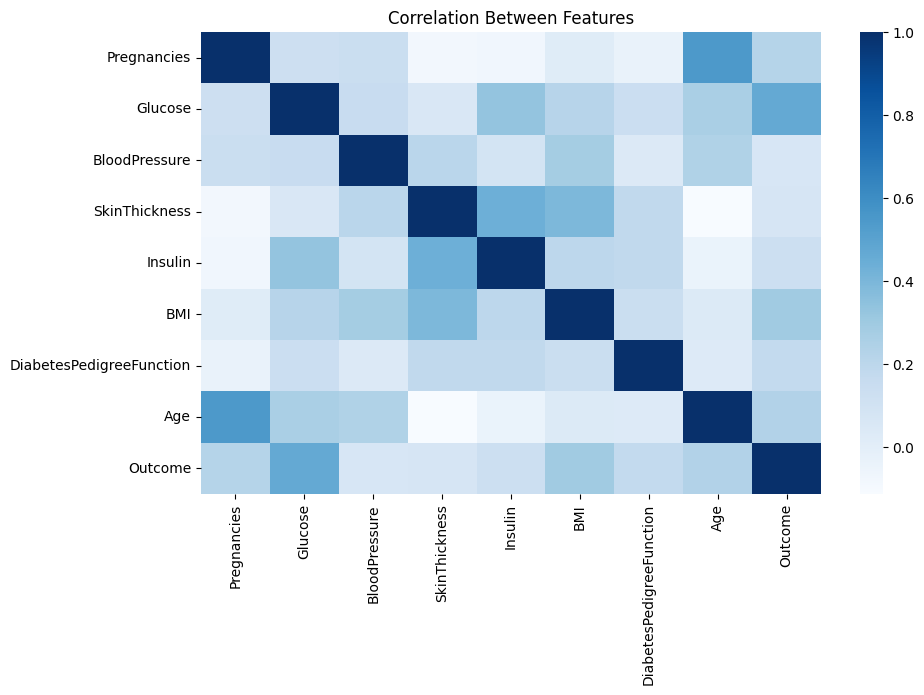

In [13]:
# ==========================================
# VISUALIZATIONS
# ==========================================

# Distribution of the target variable
plt.figure(figsize=(5,4))
sns.countplot(x=df["Outcome"])
plt.title("Diabetes Count (0 = No, 1 = Yes)")
plt.show()

# Correlation heatmap (simple pattern view)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="Blues")
plt.title("Correlation Between Features")
plt.show()


In [14]:
# ==========================================
# Create features (X) and target (y)
# ==========================================
# X = all columns except Outcome
# y = the column we want to predict (0 or 1)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# ==========================================
#  Split the data into TRAIN and TEST sets
# ==========================================
# train_test_split randomly divides data:
# - 80% for training (teaching the model)
# - 20% for testing (checking performance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==========================================
#  Create the Logistic Regression model
# ==========================================
# Logistic Regression is simple, fast, and best for beginners
model = LogisticRegression(max_iter=200)

# ==========================================
#  Train (teach) the model
# ==========================================
# The model learns patterns from the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [15]:
# ==========================================
# Evaluate the model
# ==========================================
# Now we check how well the model learned by testing it
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
accuracy


0.7467532467532467

In [16]:
# ==========================================
# Try a manual prediction
# ==========================================
# INPUT FORMAT:
# [Pregnancies, Glucose, BloodPressure, SkinThickness,
#  Insulin, BMI, DiabetesPedigreeFunction, Age]

sample_person = [[2, 130, 70, 20, 85, 28.1, 0.35, 45]]

model.predict(sample_person)


array([0])

In [17]:
# prediction output
result = model.predict(sample)[0]

if result == 1:
    print("🔴 Diabetes Risk Detected")
else:
    print("🟢 No Diabetes Risk")


🟢 No Diabetes Risk
